# Unit 5: The Trend Spotter

## Learning Outcomes

* Recognising the meaning of long-term trends in time-based data.
* Explaining the difference between short-term fluctuations and long-term trends.
* Applying graphical and computational methods to identify trends in time-series data.
* Analysing trend lines to interpret direction and rate of change over extended periods.

<iframe width="560" height="315" src="https://www.youtube.com/embed/Lqwoini7lkQ?si=cu_cng9Tmns9gz_I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


## Introduction

Some changes happen quickly. Others happen slowly over many years. To understand slow changes, we must look at data over a long period of time. This is called trend analysis.

In this unit, you will study how a quantity changes over decades. You will learn how to visualise long-term data, observe trends, and describe what the data suggests. This is the work of a trend spotter.

We will continue working with temperature data, but instead of looking at a few weeks or months, we will look at many years together.

## Activity 5.1: Understanding Long-Term Temperature Data

Daily temperature values are useful for short-term analysis. For long-term study, it is easier to work with yearly averages.

We will fetch the average maximum temperature for one city for multiple years and store it in a table.

To keep the process simple, we will:

* choose one city
* choose the same months each year
* calculate the yearly average

In [2]:
import requests
import pandas as pd


Let us choose a city. The coordinates below are for Delhi.

In [3]:
latitude = 28.6139
longitude = 77.2090

## Activity 5.2: Collecting Yearly Temperature Data

We will now write a small loop to collect data for several years. To avoid very large downloads, we will calculate the average maximum temperature for May and June of each year.

In [12]:
years = list(range(1975, 2025))
average_temps = []

for year in years:
    start_date = f"{year}-05-01"
    end_date = f"{year}-06-30"

    url = (
        "https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={latitude}&longitude={longitude}"
        f"&start_date={start_date}&end_date={end_date}"
        "&daily=temperature_2m_max"
        "&timezone=Asia%2FKolkata"
    )

    response = requests.get(url, timeout=30).json()

    if "daily" in response:
        temps = response["daily"]["temperature_2m_max"]
        avg_temp = sum(temps) / len(temps)
        average_temps.append(avg_temp)
    else:
        average_temps.append(None)


Now create a DataFrame.

In [13]:
df_trend = pd.DataFrame({
    "Year": years,
    "AverageMaxTemperature": average_temps
})

df_trend.head()

,Year,AverageMaxTemperature
0,1975,29.655738
1,1976,31.503279
2,1977,29.137705
3,1978,29.054098
4,1979,30.868852


## Activity 5.3: Visualising the Long-Term Trend

A line plot is the best way to observe long-term change.

> **Learning Note**
> A trend is a general direction in which values change over time.
A line plot helps us see long-term trends clearly, even when year-to-year values vary.

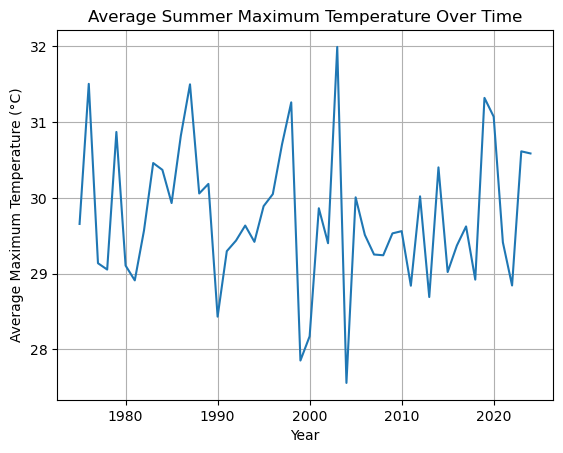

In [14]:
import matplotlib.pyplot as plt

plt.plot(df_trend["Year"], df_trend["AverageMaxTemperature"])
plt.xlabel("Year")
plt.ylabel("Average Maximum Temperature (°C)")
plt.title("Average Summer Maximum Temperature Over Time")
plt.grid(True)
plt.show()

This graph allows you to see whether temperatures remain stable, rise, fall, or fluctuate.

> **Learning Note**
>
> Real-world data often shows ups and downs from year to year.
> This does not mean there is no long-term change.
>
> Short-term variations are caused by natural factors such as rainfall,
> cloud cover, and weather patterns.
>
> To understand the overall direction of change, we look at many years together
> and use a trend line rather than focusing on individual years.


## Activity 5.4: Smoothing the Trend Using a Simple Line

Yearly data often fluctuates. To understand the overall direction, we can fit a straight line that shows the general trend.

This line does not describe individual years. It summarises the long-term change.

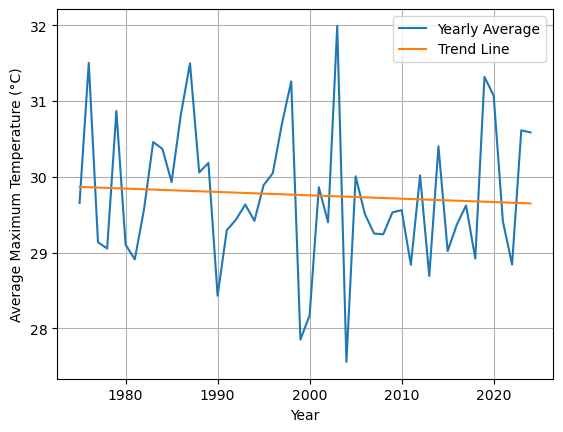

-0.0044376832700293405

In [15]:
import numpy as np

x = df_trend["Year"]
y = df_trend["AverageMaxTemperature"]

mask = ~pd.isna(y)
m, c = np.polyfit(x[mask], y[mask], 1)

trend_line = m * x + c

plt.plot(x, y, label="Yearly Average")
plt.plot(x, trend_line, label="Trend Line")
plt.xlabel("Year")
plt.ylabel("Average Maximum Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

m


The value of `m` tells us how fast the temperature is changing per year. The trend line helps us describe long-term behaviour.

* If the slope is positive, the temperature is increasing
* If it is negative, the temperature is decreasing
* If it is close to zero, the temperature is stable

We do not focus on exact predictions here. We focus on understanding direction and rate of change.

> **Learning Note**
>
> A trend line describes the overall direction of the specific data being analysed.
> It does not automatically describe all aspects of a real-world system.
>
> In this activity, we analysed average maximum temperature for selected summer months.
> Different choices, such as annual average temperature or minimum temperature,
> may show different trends.
>
> This shows why scientists must carefully choose what they measure
> before drawing conclusions.


## Practice Tasks

Try the following tasks.

1. Change the city coordinates and repeat the analysis for another city.

In [16]:
# Bengaluru
latitude = 12.9716
longitude = 77.5946

## Run the same data collection, DataFrame creation, and plotting steps again.

2. Change the months to March and April and observe how the trend changes.

In [19]:
average_temps = []
for year in years:
    start_date = f"{year}-03-01"
    end_date = f"{year}-04-30"

    url = (
        "https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={latitude}&longitude={longitude}"
        f"&start_date={start_date}&end_date={end_date}"
        "&daily=temperature_2m_max"
        "&timezone=Asia%2FKolkata"
    )

    response = requests.get(url, timeout=30).json()

    if "daily" in response:
        temps = response["daily"]["temperature_2m_max"]
        avg_temp = sum(temps) / len(temps)
        average_temps.append(avg_temp)
    else:
        average_temps.append(None)

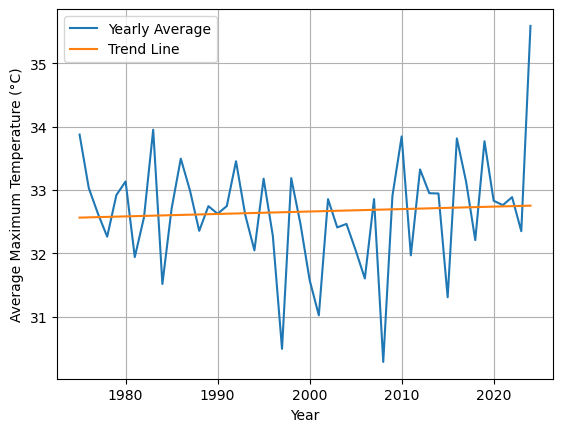

0.0038583826973413557

In [20]:
df_trend = pd.DataFrame({
    "Year": years,
    "AverageMaxTemperature": average_temps
})

x = df_trend["Year"]
y = df_trend["AverageMaxTemperature"]

mask = ~pd.isna(y)
m, c = np.polyfit(x[mask], y[mask], 1)

trend_line = m * x + c

plt.plot(x, y, label="Yearly Average")
plt.plot(x, trend_line, label="Trend Line")
plt.xlabel("Year")
plt.ylabel("Average Maximum Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

m

3. Find the average temperature change per decade using the slope.
> *Hint*: To find the change per decade, multiply by 10. The slope tells us the average change per year.
Since a decade has 10 years, multiplying the slope by 10 gives the average change per decade for this dataset.

In [ ]:
temperature_change_per_decade = m * 10

4. Compare the first 10 years and the last 10 years of the dataset.

In [21]:
first_10_years = df_trend[df_trend["Year"] <= years[9]]["AverageMaxTemperature"].mean()
last_10_years = df_trend[df_trend["Year"] >= years[-10]]["AverageMaxTemperature"].mean()

first_10_years, last_10_years

(32.78213114754098, 33.06508196721311)

* If the last 10-year average is higher, recent years are warmer
* If it is lower, recent years are cooler for this measure
* This comparison avoids focusing on single unusual years


5. Explain why long-term data is more useful than short-term data for trend analysis.

**Solution**: Short-term data is strongly affected by year-to-year weather variations.
Long-term data smooths out these fluctuations and reveals the overall direction of change.

This is why scientists study decades of data rather than a few years when analysing trends.

## Reflection (Optional)

In this unit, you studied how data behaves over many years. You used real temperature data, visualised long-term change, and identified trends using graphs and simple models.

Reflect on the following:

* Why is long-term data important for understanding slow changes
* How did the trend line help you see the overall direction
* What might cause short-term fluctuations in temperature
* Where else could long-term trend analysis be useful